In [1]:
#
# STEP A: SETUP AND DATA LOADING
#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the same folder
df = pd.read_csv('adult 3.csv')

#

In [3]:
# ================================================================
# Screenshot 1: Your code for cleaning the data.
# This section is now updated to prevent the warning.
# ================================================================
#
# Replace the '?' with NaN to officially mark it as missing
df.replace('?', pd.NA, inplace=True)
# Fill the missing values with the mode (the most common value)
for column in ['workclass', 'occupation', 'native-country']:
    mode = df[column].mode()[0]
    # -- THIS IS THE UPDATED LINE --
    df[column] = df[column].fillna(mode)
#
# ================================================================

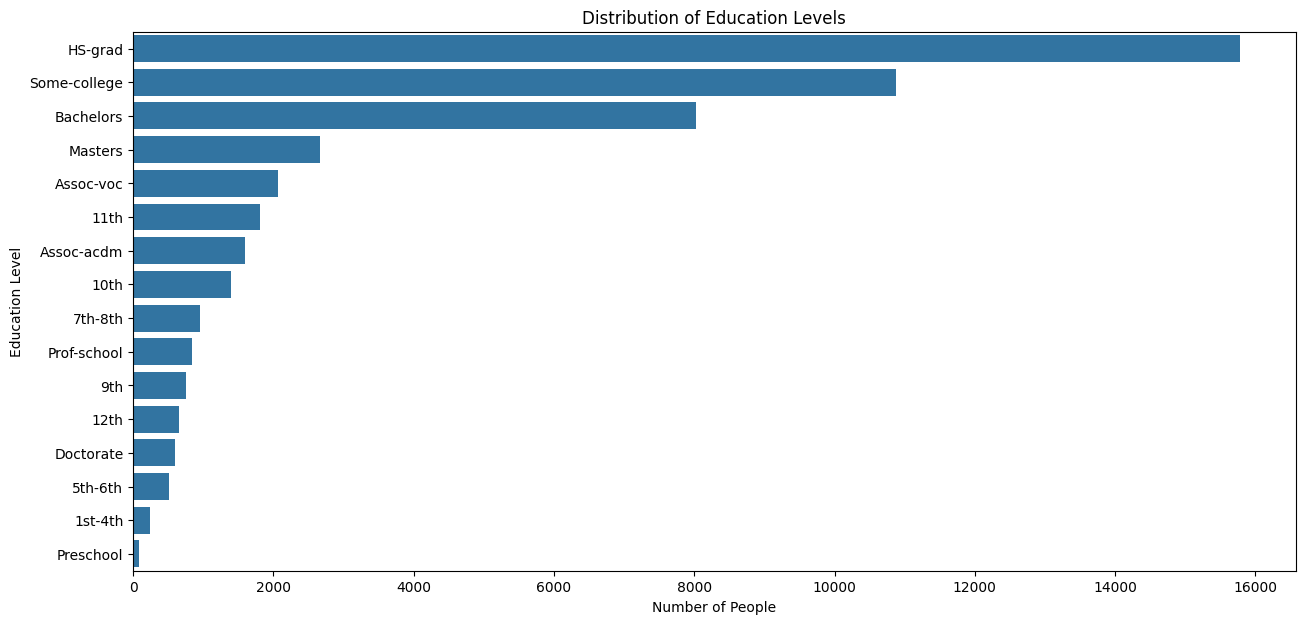

In [4]:
# ================================================================
# Screenshot 2: A chart you created.
# ================================================================
#
plt.figure(figsize=(15, 7))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Number of People')
plt.ylabel('Education Level')
plt.show()
#
# ================================================================

In [5]:
#
# Prepare data for the model
# Convert text columns to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Split data into features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#

In [6]:
#
# ================================================================
# Screenshot 3: Your code for training the Random Forest model.
# ================================================================
#
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)
#
# ================================================================
#
#
# Make predictions
y_pred_rf = rf_model.predict(X_test)

#

In [7]:
# ================================================================
# Screenshot 4: The output showing the accuracy scores.
# ================================================================
#
print("Random Forest Model Accuracy:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rf):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
#
# ================================================================

Random Forest Model Accuracy:
Accuracy Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



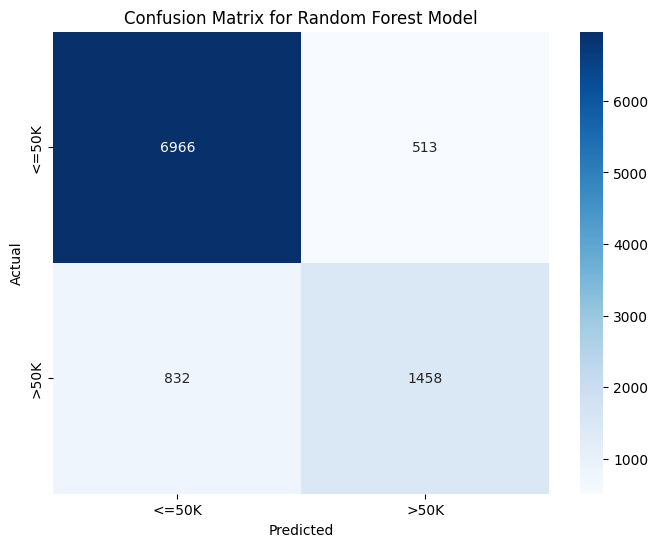

In [8]:
# ================================================================
# Screenshot 5: The confusion matrix for the best model.
# =================================G===============================
#
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
#
# ================================================================